#### Patrick Brockmann
LSCE - 15 May 2025

- Explore linear interpolation https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
- Explore Piecewise Cubic Hermite Interpolating Polynomial (PCHIPS) https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html
- Data read from a saved worksheet from PyAnalySeries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import matplotlib.ticker as ticker
import pandas as pd

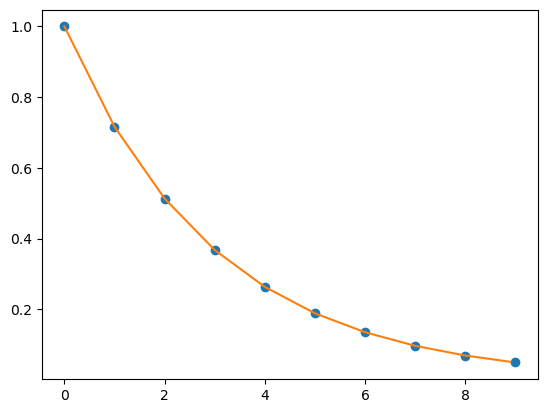

In [3]:
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y, fill_value="extrapolate")

xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`

plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

In [4]:
f(10)

array(0.03009069)

In [6]:
df1 = pd.read_excel('../test/ws_ex.xlsx', sheet_name='Serie Id-0CF20BB2')
df1

,years,Daily insolation [W/m2],Type,Name,Y axis inverted,Color,Comment,History
0,1000,533.855912,Serie,NaN,0.0,#c5b0d5,NaN,"Insolation serie ""Daily insolation"" with param..."
1,999,531.847482,NaN,NaN,NaN,NaN,NaN,NaN
2,998,526.920205,NaN,NaN,NaN,NaN,NaN,NaN
3,997,519.116394,NaN,NaN,NaN,NaN,NaN,NaN
4,996,509.152388,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
996,4,493.239259,NaN,NaN,NaN,NaN,NaN,NaN
997,3,487.829990,NaN,NaN,NaN,NaN,NaN,NaN
998,2,483.563566,NaN,NaN,NaN,NaN,NaN,NaN
999,1,480.671331,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df1.columns

Index(['years', 'Daily insolation [W/m2]', 'Type', 'Name', 'Y axis inverted',
       'Color', 'Comment', 'History'],
      dtype='object')

In [8]:
df2 = pd.read_excel('../test/ws_ex.xlsx', sheet_name='Serie Id-34AE56JH')
df2

,depthODP849 [cm],d13Cforams-b,Type,Name,Y axis inverted,Color,Comment,History
0,7,0.21,Serie,Another serie,1.0,#58ff3a,NaN,NaN
1,17,0.08,NaN,NaN,NaN,NaN,NaN,NaN
2,28,0.19,NaN,NaN,NaN,NaN,NaN,NaN
3,45,-0.15,NaN,NaN,NaN,NaN,NaN,NaN
4,55,-0.27,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
379,3908,-0.28,NaN,NaN,NaN,NaN,NaN,NaN
380,3915,-0.38,NaN,NaN,NaN,NaN,NaN,NaN
381,3918,-0.34,NaN,NaN,NaN,NaN,NaN,NaN
382,3922,-0.29,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df2.columns

Index(['depthODP849 [cm]', 'd13Cforams-b', 'Type', 'Name', 'Y axis inverted',
       'Color', 'Comment', 'History'],
      dtype='object')

In [10]:
x1Name = 'years'
y1Name = 'Daily insolation [W/m2]'
x2Name = 'depthODP849 [cm]'
y2Name = 'd13Cforams-b'
x1 = df1[x1Name]
y1 = df1[y1Name]
x2 = df2[x2Name]
y2 = df2[y2Name]

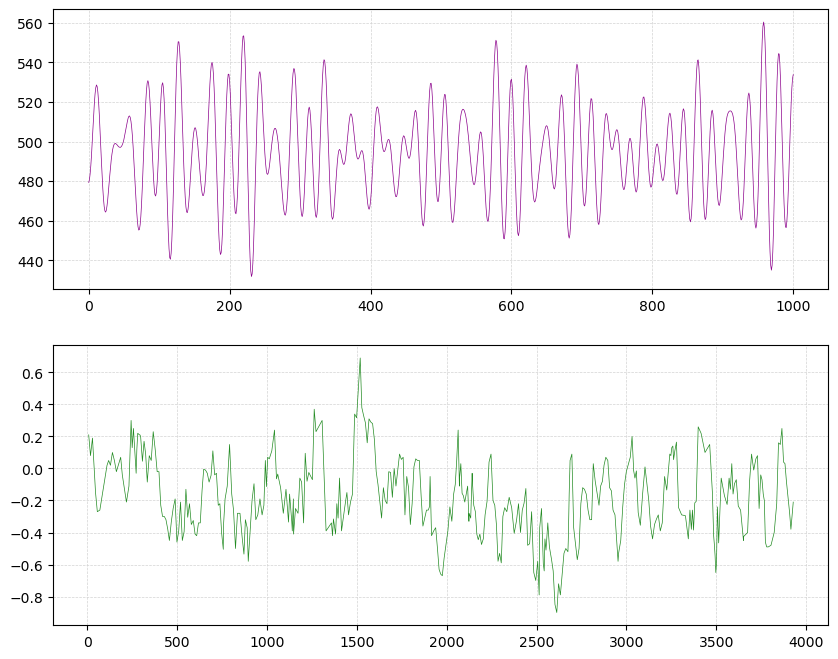

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))

axs[0].plot(x1, y1, c='darkmagenta', lw=0.5)
axs[0].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)

axs[1].plot(x2, y2, c='forestgreen', lw=0.5)
axs[1].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)

plt.show()

In [13]:
dfi = pd.read_excel('../test/ws_ex.xlsx', sheet_name='INTERPOLATION Id-20A10A97')
dfi

,X1Coords,X2Coords,X1Name,Type,Name,Comment,History
0,124.834437,1391.467881,years,INTERPOLATION,Pointers,NaN,NaN
1,388.300221,1986.542384,NaN,NaN,NaN,NaN,NaN
2,582.211038,3467.087748,NaN,NaN,NaN,NaN,NaN


In [14]:
#---------------------------------------------------------------------------------------------
def safe_PchipInterpolator(X1Coords, X2Coords):
    f_pchip = interpolate.PchipInterpolator(X1Coords, X2Coords, extrapolate=False)
    
    def extrapolated_func(x):
        if x < X1Coords[0]:
            slope = (X2Coords[1] - X2Coords[0]) / (X1Coords[1] - X1Coords[0])
            return X2Coords[0] + slope * (x - X1Coords[0])
        elif x > X1Coords[-1]:
            slope = (X2Coords[-1] - X2Coords[-2]) / (X1Coords[-1] - X1Coords[-2])
            return X2Coords[-1] + slope * (x - X1Coords[-1])
        else:
            return f_pchip(x)

    return np.vectorize(extrapolated_func, otypes=[float])

#---------------------------------------------------------------------------------------------
def defineInterpolationFunctions(X1Coords, X2Coords, interpolationMode='Linear'):
    if interpolationMode == 'Linear':
        f_1to2 = interpolate.interp1d(X1Coords, X2Coords, kind='linear', fill_value='extrapolate')
        f_2to1 = interpolate.interp1d(X2Coords, X1Coords, kind='linear', fill_value='extrapolate')
    elif interpolationMode == 'PCHIP':
        f_1to2 = defineInterpolationWindow.safe_PchipInterpolator(X1Coords, X2Coords)
        f_2to1 = defineInterpolationWindow.safe_PchipInterpolator(X2Coords, X1Coords)

    return (f_1to2, f_2to1)

In [15]:
X1Coords = dfi['X1Coords']
X2Coords = dfi['X2Coords']

f_1to2, f_2to1 = defineInterpolationFunctions(X1Coords, X2Coords, interpolationMode='Linear')
g_1to2, g_2to1 = defineInterpolationFunctions(X1Coords, X2Coords, interpolationMode='Linear')

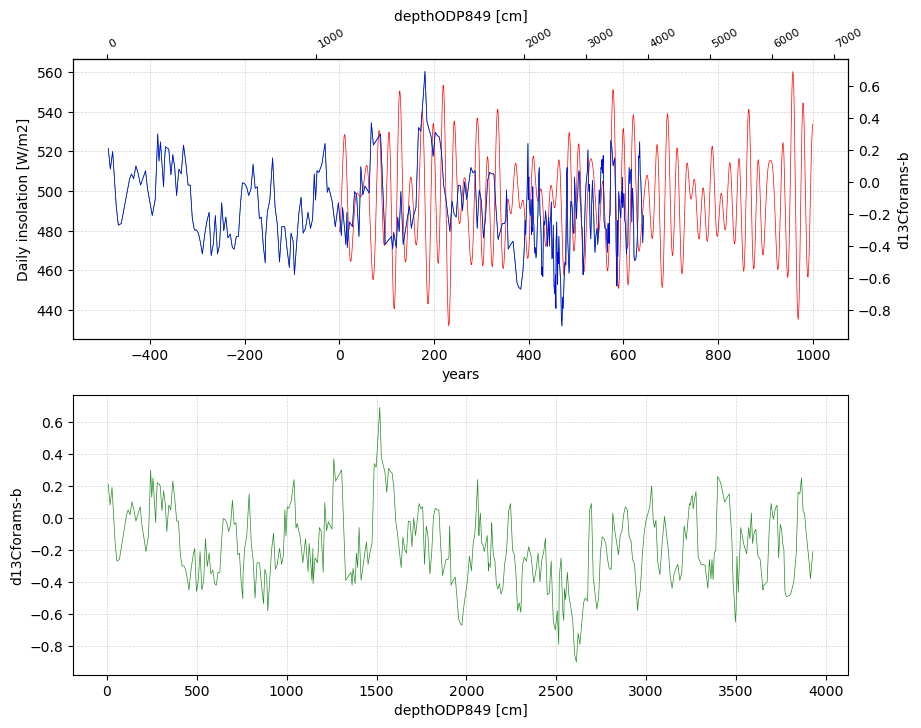

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))

axs[0].plot(x1, y1, c='red', lw=0.5)
axs[0].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
axs[0].set_xlabel(x1Name)
axs[0].set_ylabel(y1Name)
#xlim = axs[0].get_xlim()

axs[1].plot(x2, y2, c='forestgreen', lw=0.5)
axs[1].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
axs[1].set_xlabel(x2Name)
axs[1].set_ylabel(y2Name)

axsInterp = axs[0].twinx()
axsInterp.set_ylabel(y2Name)
axsInterp.plot(f_2to1(x2), y2, c='forestgreen', lw=0.5)
second_xaxis = axsInterp.secondary_xaxis('top', functions=(f_1to2, f_2to1))
second_xaxis.tick_params(labelrotation=30, labelsize=8)
second_xaxis.set_xlabel(x2Name)
plt.setp(second_xaxis.get_xticklabels(), horizontalalignment='left')
#axsInterp.set_xlim(xlim)

axsInterp.plot(g_2to1(x2), y2, c='blue', lw=0.5)

plt.show()

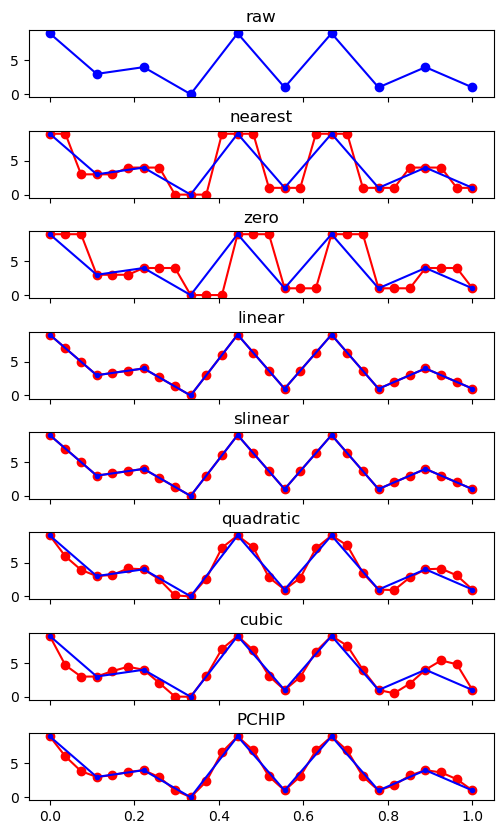

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

np.random.seed(6)
kinds = ('nearest', 'zero', 'linear', 'slinear', 'quadratic', 'cubic')

N = 10
x = np.linspace(0, 1, N)
y = np.random.randint(10, size=(N,))

new_x = np.linspace(0, 1, 28)
fig, axs = plt.subplots(nrows=len(kinds)+2, sharex=True, figsize=(6,10))
axs[0].plot(x, y, 'bo-')
axs[0].set_title('raw')
for ax, kind in zip(axs[1:-1], kinds):
    new_y = interpolate.interp1d(x, y, kind=kind)(new_x)
    ax.plot(new_x, new_y, 'ro-')
    ax.plot(x, y, 'b.-')
    plt.subplots_adjust(hspace=0.5)
    ax.set_title(kind)

new_y = interpolate.PchipInterpolator(x, y, extrapolate=True)(new_x)
axs[-1].plot(new_x, new_y, 'ro-')
axs[-1].plot(x, y, 'b.-')
plt.subplots_adjust(hspace=0.5)
axs[-1].set_title("PCHIP")

plt.show()

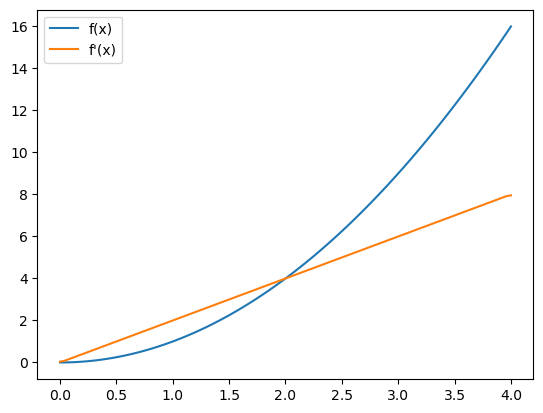

In [18]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return np.power(x, 2)
x = np.linspace(0, 4, 100)
y = f(x)
dy = np.gradient(y, x)
plt.plot(x, y, label='f(x)')
plt.plot(x, dy, label="f'(x)")
plt.legend()
plt.show()

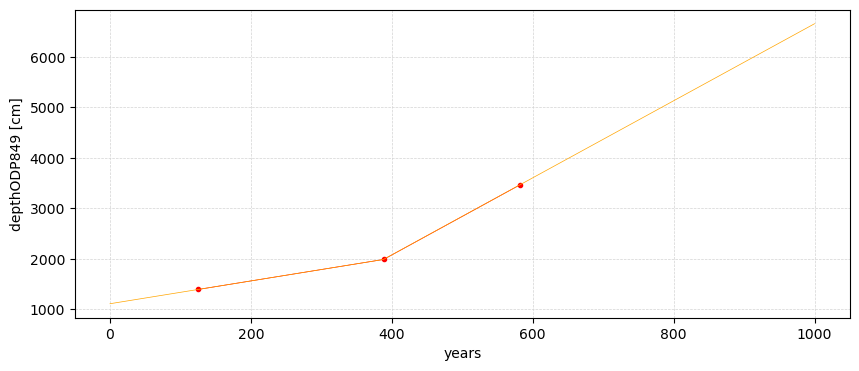

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(10,4))

axs.plot(X1Coords, X2Coords, '.-', c='red', lw=0.5)
axs.plot(x1, g_1to2(x1), c='orange', lw=0.5)
axs.grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
axs.set_xlabel(x1Name)
axs.set_ylabel(x2Name)   

plt.show()

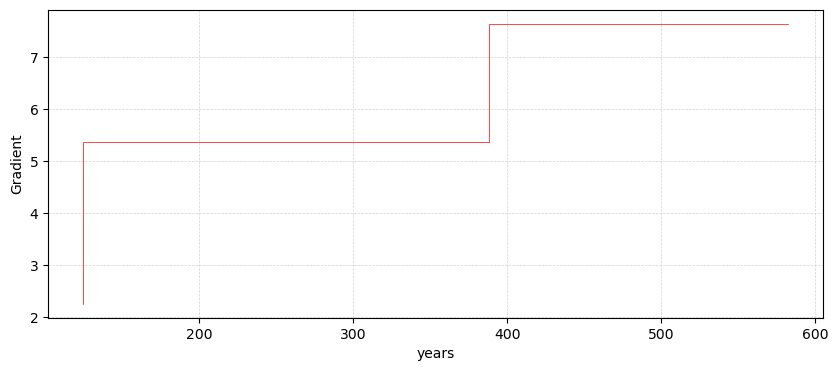

In [25]:
fig, axs = plt.subplots(1, 1, figsize=(10,4))

gradient = np.gradient(X2Coords, X1Coords)

axs.step(X1Coords, gradient, c='red', lw=0.5)
axs.grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
axs.set_xlabel(x1Name)
axs.set_ylabel("Gradient")

plt.show()

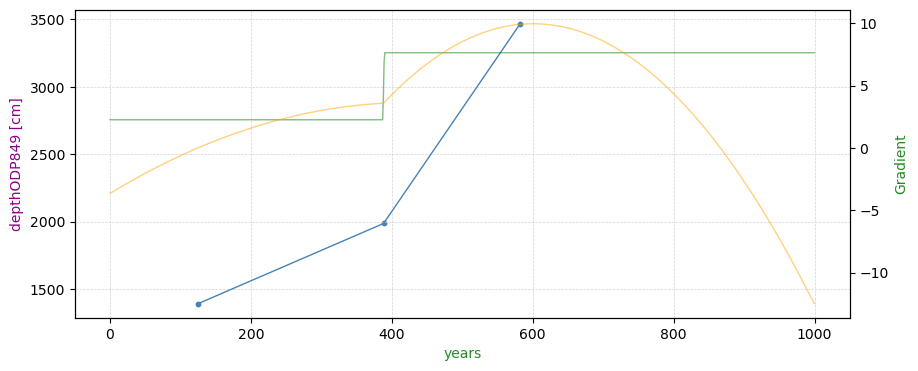

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))

ax.plot(X1Coords, X2Coords, color='steelblue', lw=1)
ax.scatter(X1Coords, X2Coords, s=10, marker='o', color='steelblue')
ax.grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)
ax.set_xlabel(x1Name, color='forestgreen')
ax.set_ylabel(x2Name, color='darkmagenta')

kind = 'linear'
f_1to2 = interpolate.interp1d(X1Coords, X2Coords, kind=kind, fill_value="extrapolate")
f_2to1 = interpolate.interp1d(X2Coords, X1Coords, kind=kind, fill_value="extrapolate")

g_1to2 = interpolate.PchipInterpolator(X1Coords, X2Coords, extrapolate=True)
g_2to1 = interpolate.PchipInterpolator(X2Coords, X1Coords, extrapolate=True)

gradient1 = np.gradient(X2Coords, X1Coords)
gradient2 = np.gradient(f_1to2(x1), x1).astype(np.float32)  # to avoid unnecessary precision
gradient3 = np.gradient(g_1to2(x1), x1).astype(np.float32)  # to avoid unnecessary precision

axGradient= ax.twinx()
axGradient.set_ylabel('Gradient', color='forestgreen')
#axGradient.step(coordsX1, gradient1, color='darkorange', lw=1, where='pre')
axGradient.plot(x1, gradient2, color='green', lw=1, alpha=0.5)
axGradient.plot(x1, gradient3, color='orange', lw=1, alpha=0.5)

plt.show()